FLIGHTS PRICE PREDICTION

In [728]:
#Importing Libraries:
import numpy as np
import pandas as pd

In [729]:
#Reading excel file and converting it in dataframe:
ds=pd.read_excel("C:\\Users\\Asus\\Desktop\\flights_data.xlsx")
df=pd.DataFrame(ds)
df.head()

,Unnamed: 0,Airline,Journey Date,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Flight_no,Price
0,0,GO FIRST,26/02/2022,Delhi,Mumbai,DEL → BOM,19:50,22:10,02h 20m,non-stop,G8- 323,7740
1,1,Indigo,26/02/2022,Delhi,Mumbai,DEL → BOM,20:00,22:15,02h 15m,non-stop,6E-6261,7845
2,2,Vistara,26/02/2022,Delhi,Mumbai,DEL → BOM,19:50,22:00,02h 10m,non-stop,UK-985,8790
3,3,Air India,26/02/2022,Delhi,Mumbai,DEL → BOM,20:00,22:10,02h 10m,non-stop,AI-805,8790
4,4,Indigo,26/02/2022,Delhi,Mumbai,DEL → BOM,21:15,23:30,02h 15m,non-stop,6E-6722,9945


In [730]:
# Rows & Columns in  Train dataset:
df.shape

(4749, 12)

4749 rows and 12 columns

In [731]:
# Datatype of dataset

df.dtypes

Unnamed: 0       int64
Airline         object
Journey Date    object
Source          object
Destination     object
Route           object
Dep_Time        object
Arrival_Time    object
Duration        object
Total_Stops     object
Flight_no       object
Price            int64
dtype: object

In [732]:
# Information about Dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4749 entries, 0 to 4748
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    4749 non-null   int64 
 1   Airline       4749 non-null   object
 2   Journey Date  4749 non-null   object
 3   Source        4749 non-null   object
 4   Destination   4749 non-null   object
 5   Route         4749 non-null   object
 6   Dep_Time      4749 non-null   object
 7   Arrival_Time  4749 non-null   object
 8   Duration      4749 non-null   object
 9   Total_Stops   4749 non-null   object
 10  Flight_no     4749 non-null   object
 11  Price         4749 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 445.3+ KB


In [733]:
#Null value in dataset

df.isnull().sum()

Unnamed: 0      0
Airline         0
Journey Date    0
Source          0
Destination     0
Route           0
Dep_Time        0
Arrival_Time    0
Duration        0
Total_Stops     0
Flight_no       0
Price           0
dtype: int64

In [734]:
# Checking Unique values of Dataset:

column_name =df.columns.values
for column in column_name:
    print("{0}: {1}".format(column, df[column].unique()))

Unnamed: 0: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215]
Airline: ['GO FIRST' 'Indigo' 'Vistara' 'Air India' 'AirAsia' 'SpiceJet' 'StarAir'
 'Trujet' 'Air Asia' 'Go Fir

## Data Pre-Processing

In [735]:
df['Journey Date']

0       26/02/2022
1       26/02/2022
2       26/02/2022
3       26/02/2022
4       26/02/2022
           ...    
4744    16/03/2022
4745    16/03/2022
4746    16/03/2022
4747    16/03/2022
4748    16/03/2022
Name: Journey Date, Length: 4749, dtype: object

Converting object to datetime datatypes

In [736]:
# day separated from date
df["Journey_day"] = pd.to_datetime(df["Journey Date"], format="%d/%m/%Y").dt.day

In [737]:
# month separated from date
df["Journey_month"] = pd.to_datetime(df["Journey Date"], format ="%d/%m/%Y").dt.month

In [738]:
df['Journey_month'].value_counts()

3    2653
4    1185
2     911
Name: Journey_month, dtype: int64

DEP_TIME TO HOURS AND MINUTE

In [739]:
#departure hour extracted from  departure time.
df["Depart_Hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

#departure minute extracted from  departure time.
df["Depart_Min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

In [740]:
# Arrival time is separated into arrival hour and arrival minute:

df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute


In [741]:
# Separating hours and minutes from duration column from the dataset.
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

duration column is separated into hours and minutes in the dataset.

In [742]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

## Data cleaning:

In [743]:
df.drop(["Duration","Arrival_Time","Dep_Time","Journey Date","Unnamed: 0"], axis = 1, inplace = True)

In [744]:
df['Total_Stops'].value_counts()

1-stop       3176
non-stop      592
1 Stop        462
2+-stop       292
2 Stop(s)     126
Non Stop       91
3 Stop(s)      10
Name: Total_Stops, dtype: int64

In [745]:
#replacing repeated values:

df['Total_Stops'].replace({'Non Stop':'non-stop', '1 Stop': '1-stop', '2 Stop(s)': '2+-stop', '3 Stop(s)': '2+-stop', '4 Stop(s)': '2+-stop'}, inplace = True)

In [746]:
df['Total_Stops'].replace({"non-stop": 0, "1-stop": 1, "2+-stop": 2}, inplace = True)

# EDA:

In [747]:
#Importing plotting libraries:

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [748]:
#Printing Numeric columns:

numeric_features=df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Depart_Hour',
       'Depart_Min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [749]:
# Printing Categorical columns:

cate_features=df.select_dtypes(include=[np.object])
cate_features.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Flight_no'], dtype='object')

<AxesSubplot:xlabel='Price', ylabel='Density'>

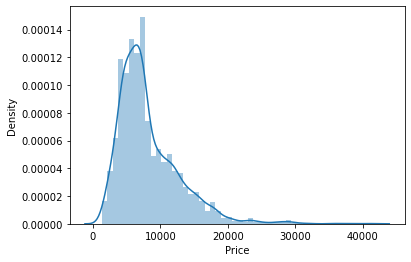

In [750]:
# Target Label plotting:

sns.distplot(df['Price'], kde=True)

In [751]:
# removing skewness using logarithm method from target label:

df["Price"]=np.log1p(df["Price"])

<AxesSubplot:xlabel='Price', ylabel='Density'>

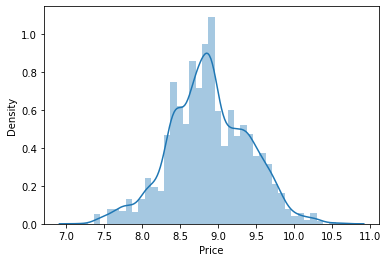

In [752]:
sns.distplot(df["Price"])

<AxesSubplot:xlabel='Journey_day', ylabel='Count'>

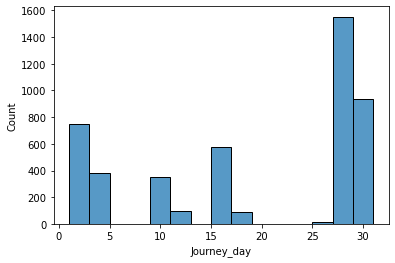

In [753]:
sns.histplot(df['Journey_day'])

<AxesSubplot:xlabel='Total_Stops', ylabel='Count'>

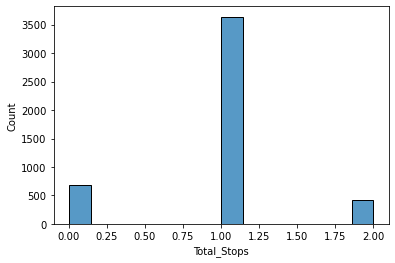

In [582]:
sns.histplot(df['Total_Stops'])

<AxesSubplot:xlabel='Journey_month', ylabel='Count'>

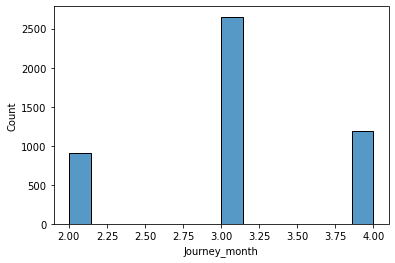

In [583]:
sns.histplot(df['Journey_month'])

<AxesSubplot:xlabel='Depart_Hour', ylabel='Count'>

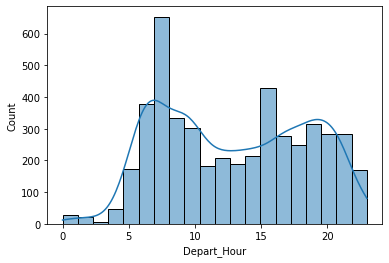

In [584]:
sns.histplot(df['Depart_Hour'],kde=True)

<AxesSubplot:xlabel='Depart_Min', ylabel='Count'>

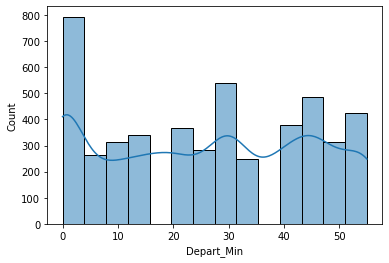

In [585]:
sns.histplot(df['Depart_Min'],kde=True)

<AxesSubplot:xlabel='Arrival_hour', ylabel='Count'>

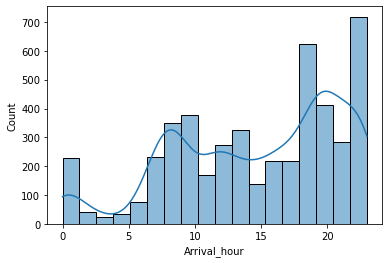

In [586]:
sns.histplot(df['Arrival_hour'],kde=True)

<AxesSubplot:xlabel='Arrival_min', ylabel='Count'>

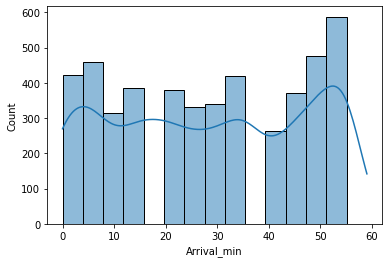

In [587]:
sns.histplot(df['Arrival_min'],kde=True)

<AxesSubplot:xlabel='Duration_hours', ylabel='Count'>

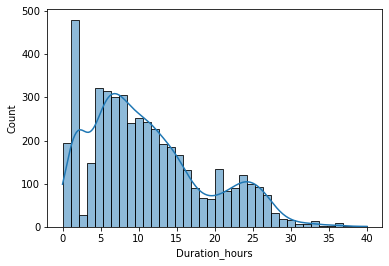

In [588]:
sns.histplot(df['Duration_hours'],kde=True)

<AxesSubplot:xlabel='Duration_mins', ylabel='Count'>

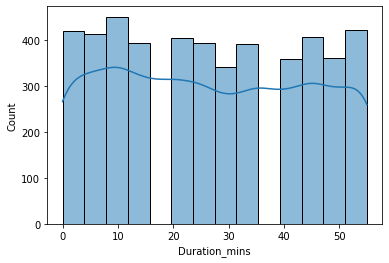

In [589]:
sns.histplot(df['Duration_mins'],kde=True)

Vistara      1507
Air India    1078
Indigo        903
GO FIRST      390
AirAsia       376
SpiceJet      206
IndiGo        173
Go First       64
Air Asia       49
StarAir         2
Trujet          1
Name: Airline, dtype: int64


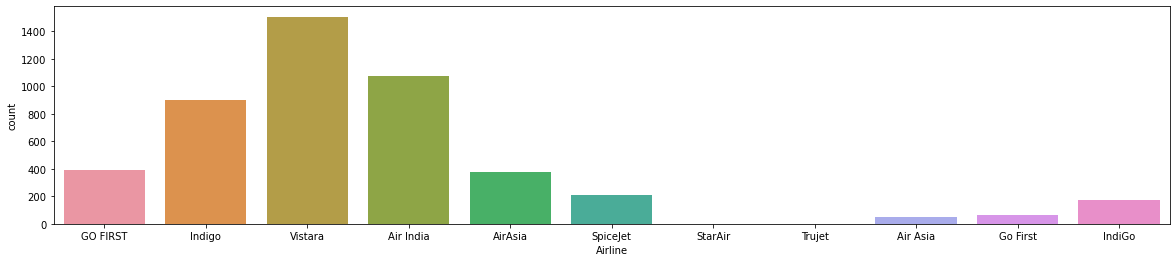

In [590]:
plt.figure(figsize=(20,4))
ax=sns.countplot(x="Airline", data=df)
print(df["Airline"].value_counts())

Delhi        1659
Mumbai       1040
Bangalore     935
Kolkata       426
Chennai       247
Goa           226
Hyderabad     216
Name: Source, dtype: int64


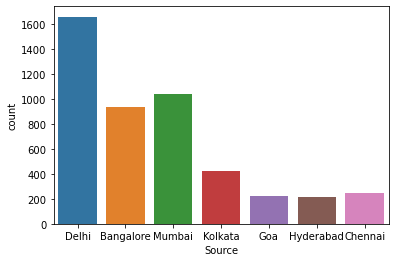

In [591]:
ax=sns.countplot(x="Source", data=df)
print(df["Source"].value_counts())

Chennai      956
Kolkata      663
Hyderabad    647
Mumbai       642
Goa          586
Bangalore    580
Delhi        406
New Delhi    269
Name: Destination, dtype: int64


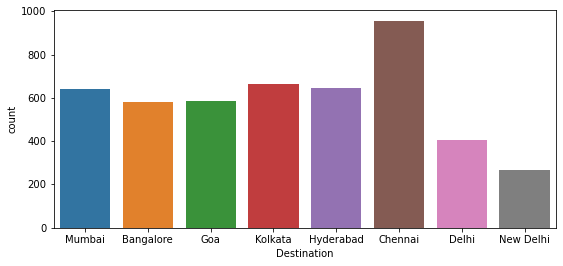

In [592]:
plt.figure(figsize=(9,4))
ax=sns.countplot(x="Destination", data=df)
print(df["Destination"].value_counts())

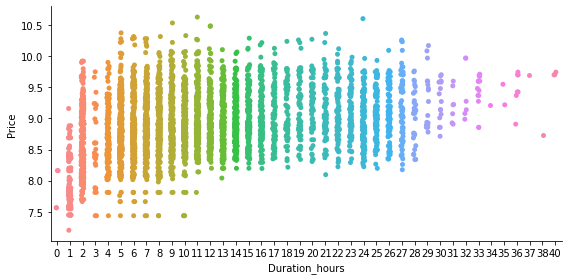

In [770]:
# Duration_hours vs Price
sns.catplot(y = "Price", x = "Duration_hours", data = df.sort_values("Price", ascending = False),height = 4, aspect = 2)
plt.show()

Flights with duration 5 hours and above have higher prices

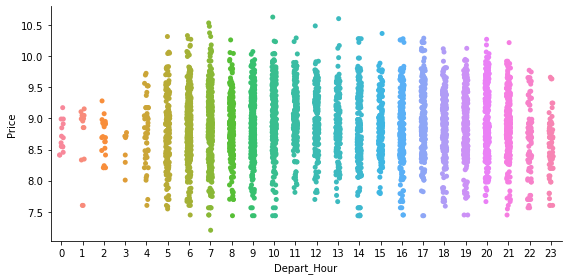

In [771]:
# Depart_Hour vs Price
sns.catplot(y = "Price", x = "Depart_Hour", data = df.sort_values("Price", ascending = False),height = 4, aspect = 2)
plt.show()

Departure hour of morning after 5am till 7 am have higher price

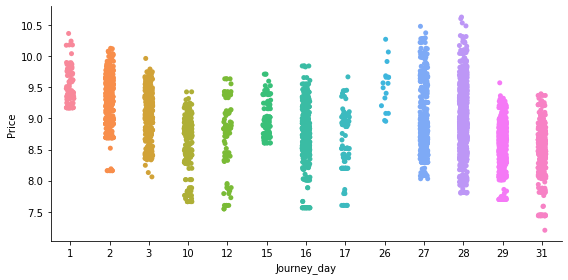

In [772]:
# Journey_day vs Price
sns.catplot(y = "Price", x = "Journey_day", data = df.sort_values("Price", ascending = False),height = 4, aspect = 2)
plt.show()

Flight fares are high during start of the month
fares are less in the mid and end last two-three days of the month 

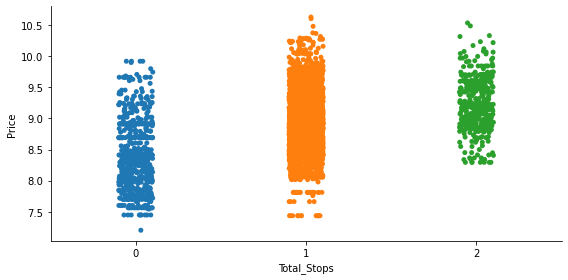

In [773]:
# Total_Stops vs Price
sns.catplot(y = "Price", x = "Total_Stops", data = df.sort_values("Price", ascending = False),height = 4, aspect = 2)
plt.show()

Flight having 1 or more stops have higher prices as compare to non stop flight 

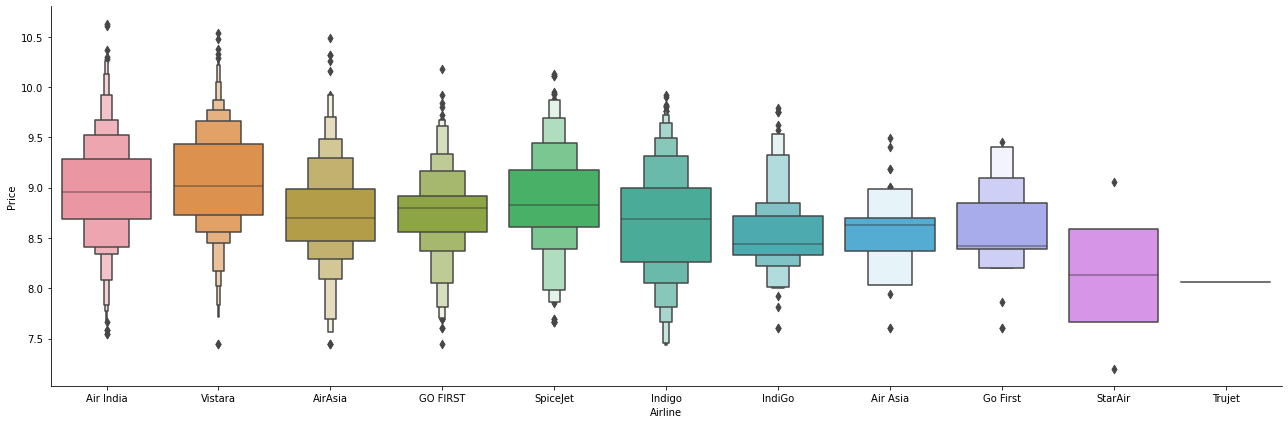

In [593]:
# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Vistara and Air India are expensive

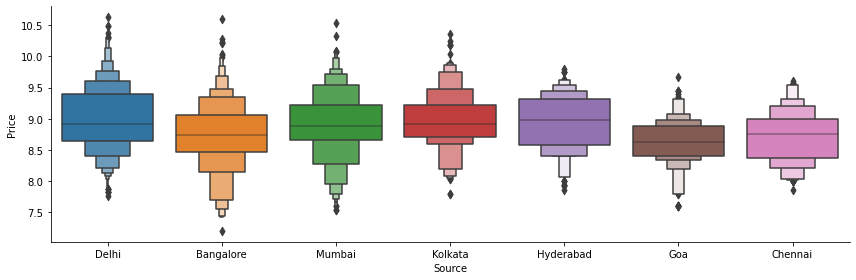

In [594]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

High Fare Price is of Delhi source flights

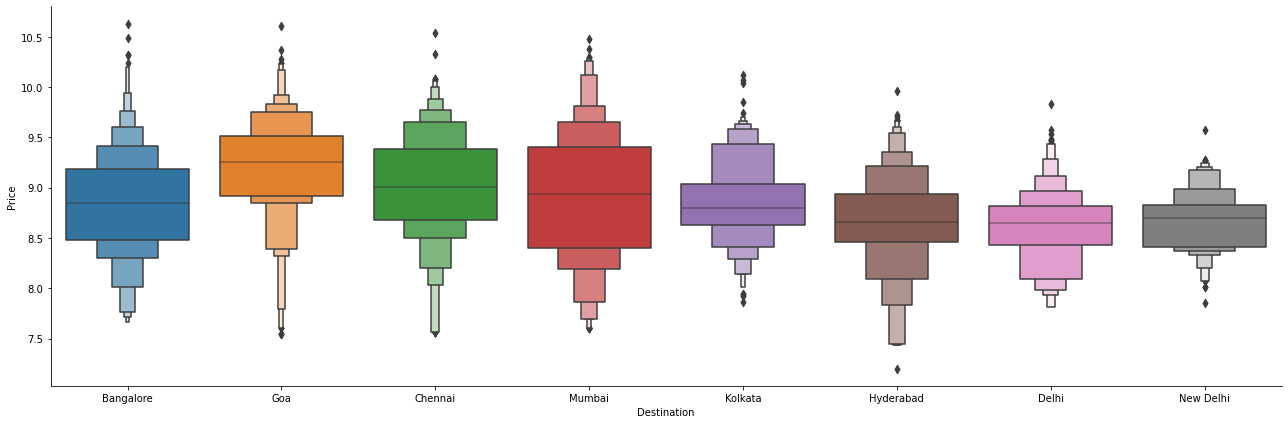

In [595]:
# Airline vs Price
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

High Fare Price is of Goa destination flights

### Handling Categorical Data

In [596]:
df["Airline"].value_counts()

Vistara      1507
Air India    1078
Indigo        903
GO FIRST      390
AirAsia       376
SpiceJet      206
IndiGo        173
Go First       64
Air Asia       49
StarAir         2
Trujet          1
Name: Airline, dtype: int64

In [598]:
#replacing repeated values:
df['Airline'].replace({"IndiGo": "Indigo", "GO FIRST":"Go First", "Air Asia": "AirAsia"}, inplace = True)

In [599]:
df["Airline"].value_counts()

Vistara      1507
Air India    1078
Indigo       1076
Go First      454
AirAsia       425
SpiceJet      206
StarAir         2
Trujet          1
Name: Airline, dtype: int64

In [600]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_AirAsia,Airline_Go First,Airline_Indigo,Airline_SpiceJet,Airline_StarAir,Airline_Trujet,Airline_Vistara
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [601]:
df["Source"].value_counts()

Delhi        1659
Mumbai       1040
Bangalore     935
Kolkata       426
Chennai       247
Goa           226
Hyderabad     216
Name: Source, dtype: int64

In [602]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Goa,Source_Hyderabad,Source_Kolkata,Source_Mumbai
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [603]:
df["Destination"].value_counts()

Chennai      956
Kolkata      663
Hyderabad    647
Mumbai       642
Goa          586
Bangalore    580
Delhi        406
New Delhi    269
Name: Destination, dtype: int64

In [604]:
df['Destination'].replace({"New Delhi": "Delhi"}, inplace = True)

In [605]:
df["Destination"].value_counts()

Chennai      956
Delhi        675
Kolkata      663
Hyderabad    647
Mumbai       642
Goa          586
Bangalore    580
Name: Destination, dtype: int64

In [606]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first= True)

Destination.head()

,Destination_Chennai,Destination_Delhi,Destination_Goa,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [607]:
df["Route"]

0                   DEL → BOM
1                   DEL → BOM
2                   DEL → BOM
3                   DEL → BOM
4                   DEL → BOM
                ...          
4744    MAA → DEL → BLR → BOM
4745    MAA → DEL → BLR → BOM
4746    MAA → DEL → BLR → BOM
4747    MAA → DEL → IXC → BOM
4748    MAA → DEL → HYD → BOM
Name: Route, Length: 4749, dtype: object

In [608]:
df["Flight_no"]

0              G8- 323
1              6E-6261
2               UK-985
3               AI-805
4              6E-6722
             ...      
4744    UK-836/819/864
4745    UK-836/817/850
4746    UK-836/819/850
4747    UK-836/637/652
4748    UK-836/879/876
Name: Flight_no, Length: 4749, dtype: object

In [609]:
# Route and Total_Stops are related to each other so dropping Route

df.drop(["Route"], axis = 1, inplace = True)

In [610]:
# Concatenate dataframe --> df + Airline + Source + Destination

df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [505]:
df.head()

,Airline,Source,Destination,Total_Stops,Flight_no,Price,Journey_day,Journey_month,Depart_Hour,Depart_Min,...,Source_Goa,Source_Hyderabad,Source_Kolkata,Source_Mumbai,Destination_Chennai,Destination_Delhi,Destination_Goa,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,Go First,Delhi,Mumbai,0,G8- 323,8.954286,26,2,19,50,...,0,0,0,0,0,0,0,0,0,1
1,Indigo,Delhi,Mumbai,0,6E-6261,8.967759,26,2,20,0,...,0,0,0,0,0,0,0,0,0,1
2,Vistara,Delhi,Mumbai,0,UK-985,9.081484,26,2,19,50,...,0,0,0,0,0,0,0,0,0,1
3,Air India,Delhi,Mumbai,0,AI-805,9.081484,26,2,20,0,...,0,0,0,0,0,0,0,0,0,1
4,Indigo,Delhi,Mumbai,0,6E-6722,9.204926,26,2,21,15,...,0,0,0,0,0,0,0,0,0,1


In [611]:
#dropping columns:

df.drop(["Airline", "Source", "Destination","Flight_no"], axis = 1, inplace = True)

In [612]:
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Depart_Hour,Depart_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Source_Goa,Source_Hyderabad,Source_Kolkata,Source_Mumbai,Destination_Chennai,Destination_Delhi,Destination_Goa,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,0,8.954286,26,2,19,50,22,10,2,20,...,0,0,0,0,0,0,0,0,0,1
1,0,8.967759,26,2,20,0,22,15,2,15,...,0,0,0,0,0,0,0,0,0,1
2,0,9.081484,26,2,19,50,22,0,2,10,...,0,0,0,0,0,0,0,0,0,1
3,0,9.081484,26,2,20,0,22,10,2,10,...,0,0,0,0,0,0,0,0,0,1
4,0,9.204926,26,2,21,15,23,30,2,15,...,0,0,0,0,0,0,0,0,0,1


## Describing the dataset

In [614]:
# describing dataset:

df.describe()

,Total_Stops,Price,Journey_day,Journey_month,Depart_Hour,Depart_Min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Source_Goa,Source_Hyderabad,Source_Kolkata,Source_Mumbai,Destination_Chennai,Destination_Delhi,Destination_Goa,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
count,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,...,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000,4749.000000
mean,0.946304,8.880511,18.810697,3.057696,12.949884,26.293957,14.680985,28.503685,11.233944,26.960202,...,0.047589,0.045483,0.089703,0.218993,0.201306,0.142135,0.123394,0.136239,0.139608,0.135186
std,0.480738,0.517736,11.110618,0.661906,5.495615,18.376180,6.334233,18.319701,7.584807,17.504624,...,0.212917,0.208383,0.285786,0.413608,0.401018,0.349226,0.328924,0.343079,0.346617,0.341959
min,0.000000,7.201916,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.525360,10.000000,3.000000,8.000000,10.000000,9.000000,10.000000,6.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.858084,27.000000,3.000000,13.000000,30.000000,16.000000,30.000000,10.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.240773,28.000000,3.000000,18.000000,45.000000,20.000000,45.000000,15.000000,45.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,10.630891,31.000000,4.000000,23.000000,55.000000,23.000000,59.000000,40.000000,55.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Key Observations:

    1. Mean and Median: Values of mean and median have differences alternatively so skewness are present.
    2. 75% percentile and max: price and duration_hours have highest outliers.
    3. Standard deviation is less than mean so high peak data.

## Correlation:

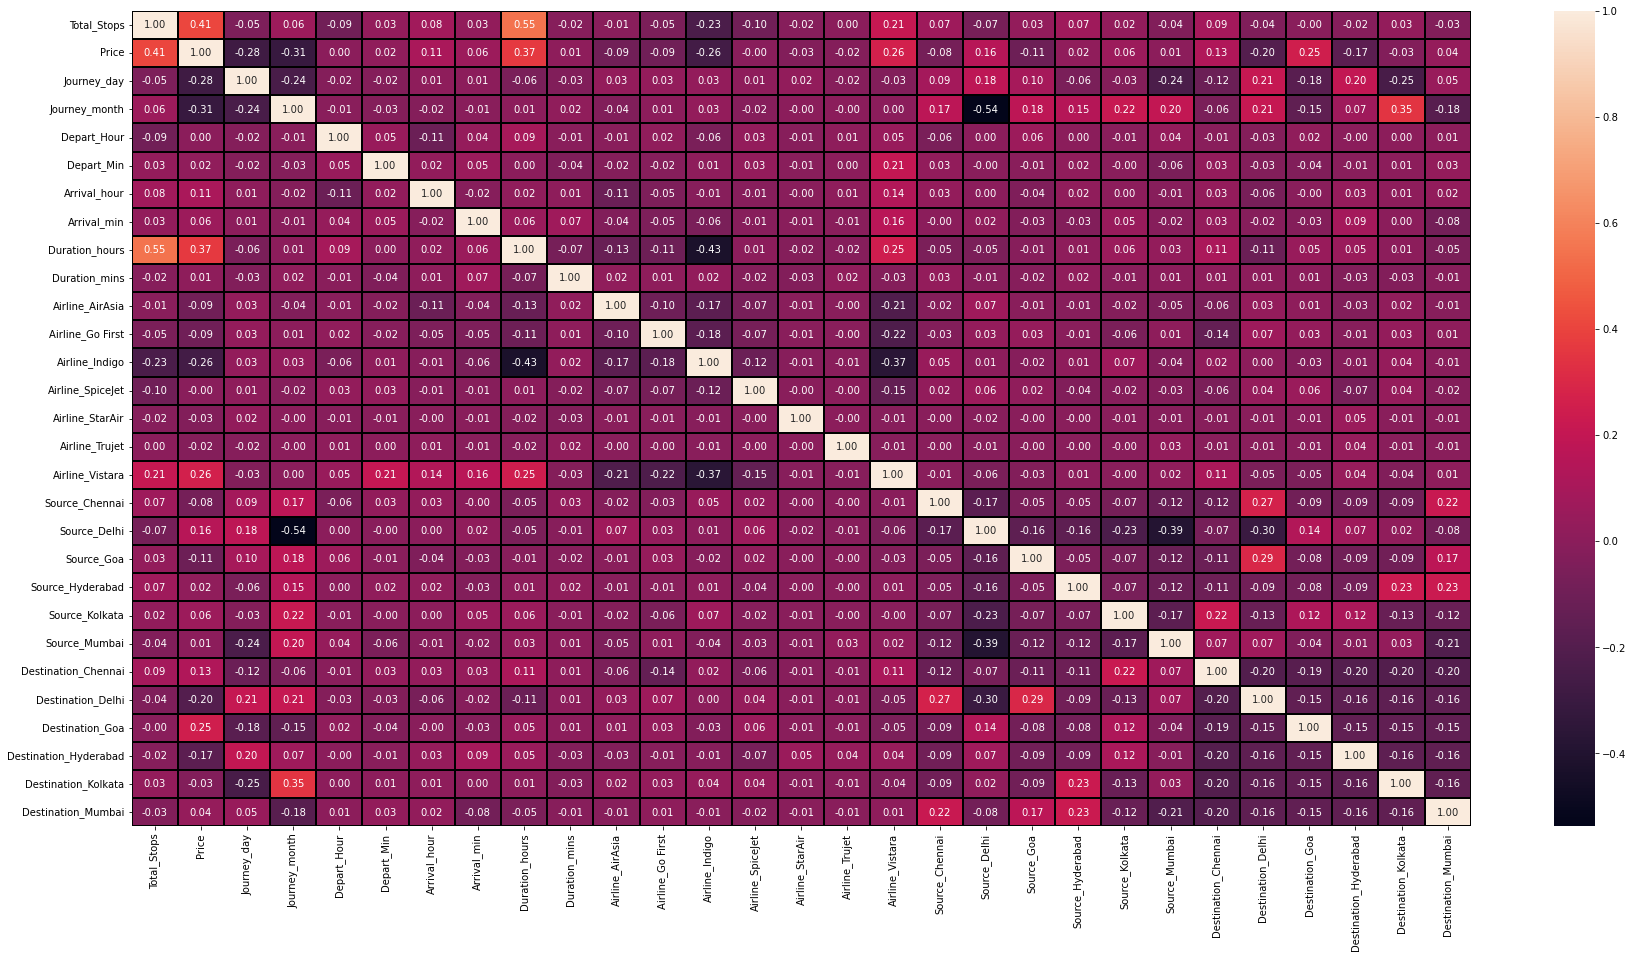

In [615]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="Black",fmt="0.2f")
plt.show()

Key Observation:
 1. Price has positive correlation with Total_Stops and negative correlation with Journey_month.
 2. Total_Stops has positive correlation with Duration_hours and negative correlation with Airline_Indigo.
 3. Multicollinearity exist

## Outliers:

Total_Stops                 AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Price                    AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Journey_day              AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Journey_month            AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Depart_Hour              AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
Depart_Min               AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
Arrival_hour             AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
Arrival_min                 AxesSubplot(0.125,0.593621;0.0945122x0.130172)
Duration_hours           AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Duration_mins            AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
Airline_AirAsia          AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
Airline_Go First         AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
Airline_Indigo           AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
Airline_SpiceJet         

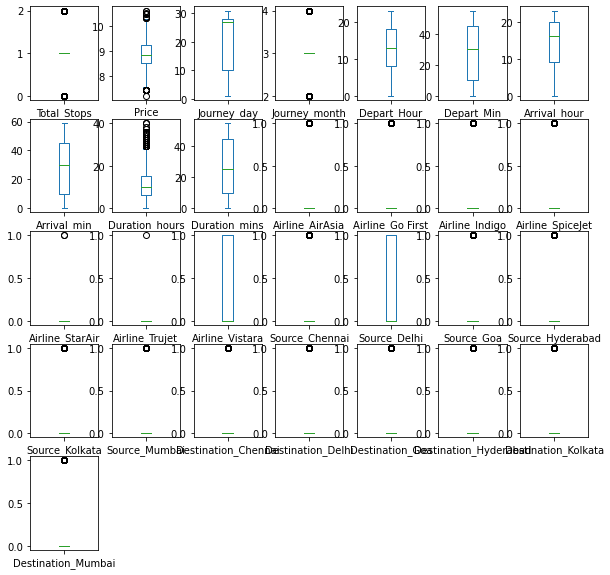

In [513]:
# Detecting Outliers:

df.plot(kind='box',subplots=True,layout=(5,7),figsize=(10,10))

Outliers present in Duration_hours and prices column

In [616]:
df1=df.copy()  #making copy of original dataset

In [617]:
#IQR Method for removing outliers:

def cap_data(data):
    for col in data.columns:
        print("capping the ",col)
        if (((data[col].dtype)=='float64') | ((data[col].dtype)=='int64')):
            percentiles = data[col].quantile([0.01,0.99]).values
            data[col][data[col] <= percentiles[0]] = percentiles[0]
            data[col][data[col] >= percentiles[1]] = percentiles[1]
        else:
            data[col]=data[col]
    return data

da1=cap_data(df1)

capping the  Total_Stops
capping the  Price
capping the  Journey_day
capping the  Journey_month
capping the  Depart_Hour
capping the  Depart_Min
capping the  Arrival_hour
capping the  Arrival_min
capping the  Duration_hours
capping the  Duration_mins
capping the  Airline_AirAsia
capping the  Airline_Go First
capping the  Airline_Indigo
capping the  Airline_SpiceJet
capping the  Airline_StarAir
capping the  Airline_Trujet
capping the  Airline_Vistara
capping the  Source_Chennai
capping the  Source_Delhi
capping the  Source_Goa
capping the  Source_Hyderabad
capping the  Source_Kolkata
capping the  Source_Mumbai
capping the  Destination_Chennai
capping the  Destination_Delhi
capping the  Destination_Goa
capping the  Destination_Hyderabad
capping the  Destination_Kolkata
capping the  Destination_Mumbai


In [619]:
da1.shape

(4749, 29)

4749 rows and 29 columns

#### Percentage Loss of data: Train dataset

In [620]:
Data_loss=((4749-4749)/4749)*100
Data_loss

0.0

No data loss

## separating x and y from dataset:

In [621]:
x = da1.drop("Price",axis=1)
y = da1["Price"]

## VIF for removing Multicollinearity

In [622]:
# Importing library: Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [623]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [624]:
vif_calc()

    VIF Factor               features
0     7.598793            Total_Stops
1     4.819468            Journey_day
2    25.262586          Journey_month
3     6.646027            Depart_Hour
4     3.263811             Depart_Min
5     6.294486           Arrival_hour
6     3.516654            Arrival_min
7     6.419162         Duration_hours
8     3.378597          Duration_mins
9     1.555581        Airline_AirAsia
10    1.566415       Airline_Go First
11    2.624620         Airline_Indigo
12    1.249169       Airline_SpiceJet
13    1.008397        Airline_StarAir
14    1.006052         Airline_Trujet
15    2.708384        Airline_Vistara
16    1.546766         Source_Chennai
17    3.007962           Source_Delhi
18    1.500748             Source_Goa
19    1.404959       Source_Hyderabad
20    1.787260         Source_Kolkata
21    2.274974          Source_Mumbai
22    2.843926    Destination_Chennai
23    2.907141      Destination_Delhi
24    2.040831        Destination_Goa
25    2.4037

## Skewness:

In [625]:
x.skew()

Total_Stops              -0.146983
Journey_day              -0.464487
Journey_month            -0.063191
Depart_Hour               0.066095
Depart_Min               -0.011114
Arrival_hour             -0.529612
Arrival_min              -0.036694
Duration_hours            0.708364
Duration_mins             0.058979
Airline_AirAsia           2.877088
Airline_Go First          2.751516
Airline_Indigo            1.306750
Airline_SpiceJet          4.484579
Airline_StarAir          48.713441
Airline_Trujet           68.912989
Airline_Vistara           0.785188
Source_Chennai            4.036320
Source_Delhi              0.632229
Source_Goa                4.251430
Source_Hyderabad          4.364149
Source_Kolkata            2.872567
Source_Mumbai             1.359379
Destination_Chennai       1.490308
Destination_Delhi         2.050340
Destination_Goa           2.290889
Destination_Hyderabad     2.121462
Destination_Kolkata       2.080358
Destination_Mumbai        2.134571
dtype: float64

In [626]:
# Using power_transform to remove skewness.

from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [627]:
# converting ndarray to dataframe
x=pd.DataFrame(x)

In [628]:
x.skew()

0      0.095597
1     -0.496001
2     -0.043976
3     -0.109967
4     -0.420741
5     -0.352142
6     -0.355298
7     -0.061073
8     -0.312447
9      2.877088
10     2.751516
11     1.306750
12     4.484579
13    48.713441
14    68.912989
15     0.785188
16     4.036320
17     0.632229
18     4.251430
19     4.364149
20     2.872567
21     1.359379
22     1.490308
23     2.050340
24     2.290889
25     2.121462
26     2.080358
27     2.134571
dtype: float64

# Scaling:

In [629]:
# Scaling the feature data:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
print('x',x)

x [[-1.90255118  0.65224867 -1.59078138 ... -0.39714977 -0.40281681
   2.52926793]
 [-1.90255118  0.65224867 -1.59078138 ... -0.39714977 -0.40281681
   2.52926793]
 [-1.90255118  0.65224867 -1.59078138 ... -0.39714977 -0.40281681
   2.52926793]
 ...
 [ 2.29224855 -0.22211312 -0.09219974 ... -0.39714977 -0.40281681
   2.52926793]
 [ 2.29224855 -0.22211312 -0.09219974 ... -0.39714977 -0.40281681
   2.52926793]
 [ 2.29224855 -0.22211312 -0.09219974 ... -0.39714977 -0.40281681
   2.52926793]]


# Model Building:

In [630]:
# Model selection:

from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [631]:
for i in range(0,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(train_x,train_y)
    pred_train=lr.predict(train_x)
    pred_test=lr.predict(test_x)
    print(f"At random state {i},the training accuracy is:- {r2_score(train_y,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(test_y,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.5485992522932279
At random state 0,the testing accuracy is:- 0.5139093571885669


At random state 1,the training accuracy is:- 0.5401302120103892
At random state 1,the testing accuracy is:- -2.9955585324850236


At random state 2,the training accuracy is:- 0.542371032074063
At random state 2,the testing accuracy is:- -1.1171569268847232


At random state 3,the training accuracy is:- 0.5375803631622931
At random state 3,the testing accuracy is:- 0.5585408662514368


At random state 4,the training accuracy is:- 0.5477166699543444
At random state 4,the testing accuracy is:- 0.5197475407087151


At random state 5,the training accuracy is:- 0.5456756492501209
At random state 5,the testing accuracy is:- 0.5280340530785533


At random state 6,the training accuracy is:- 0.5463862428774859
At random state 6,the testing accuracy is:- 0.5263438922671612


At random state 7,the training accuracy is:- 0.5463572175003131
At random state 7,the testing ac

At random state 63,the training accuracy is:- 0.5452740140625533
At random state 63,the testing accuracy is:- -12.372990201270603


At random state 64,the training accuracy is:- 0.5479515227121677
At random state 64,the testing accuracy is:- 0.5197973799786085


At random state 65,the training accuracy is:- 0.5475938641234703
At random state 65,the testing accuracy is:- -105.46224706114292


At random state 66,the training accuracy is:- 0.5541885980308717
At random state 66,the testing accuracy is:- 0.49033236940651914


At random state 67,the training accuracy is:- 0.5454929029714786
At random state 67,the testing accuracy is:- 0.5283267361162443


At random state 68,the training accuracy is:- 0.5437213254018861
At random state 68,the testing accuracy is:- 0.5383125816473185


At random state 69,the training accuracy is:- 0.5537620696805448
At random state 69,the testing accuracy is:- -85.23393906059376


At random state 70,the training accuracy is:- 0.5475509651768262
At random state

In [632]:
lr.fit(train_x,train_y)
lr.score(test_x,test_y)

-11.975286506899947

In [633]:
#Predicted data
pred=lr.predict(test_x)
pred

array([ 9.33408569,  9.12552364,  9.18314752,  8.65164304,  8.77158691,
        9.24787777,  8.66204955,  8.54569511,  8.74035189,  8.77504544,
        9.13247817,  9.1662935 ,  9.25076935,  8.65974204,  8.75288498,
        8.58019957,  8.13714725,  8.80569543,  8.57054853,  9.0685393 ,
        9.37273926,  8.19100857,  8.34186406,  8.82700836,  9.30227851,
        8.56709682,  8.81931517,  8.46227432,  8.90766354,  8.63669628,
        8.89163499,  9.46413373,  8.84316024,  8.6005766 ,  8.85353766,
        8.55698846,  9.37084619,  9.26623932,  9.28667752,  8.61632711,
        8.13471512,  9.10355492,  9.40876002,  9.26517253,  8.85049792,
        8.54588378,  8.7792185 ,  9.61372753,  8.29902   ,  8.34349282,
        8.94924401,  9.00133469,  9.43266732,  8.48010102,  8.58971264,
        9.36007944,  8.80433248,  9.73901029,  8.85286105,  8.63421035,
        8.55100727,  9.11667274,  8.42276226,  9.19892641,  9.05625659,
        9.15908534,  9.00986294,  8.41795981,  9.02336781,  9.07

In [634]:
print("Mean squared error:",mean_squared_error(test_y,pred))
print("Mean absolute error:",mean_absolute_error(test_y,pred))
print("R2Score:",r2_score(test_y,pred))
print('RMSE:', np.sqrt(mean_squared_error(test_y, pred)))

Mean squared error: 3.426943451929735
Mean absolute error: 0.34447459629861554
R2Score: -11.975286506899947
RMSE: 1.8512005434122298


In [635]:
Train_accuracy=r2_score(train_y,pred_train)
Test_accuracy=r2_score(test_y,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is -2.0972690052132452e+18 and accuracy score for training is 0.5516273270913099 and accuracy for the testing is -11.975286506899947


At cross fold 3 the cv score is -2.3101270161449843e+21 and accuracy score for training is 0.5516273270913099 and accuracy for the testing is -11.975286506899947


At cross fold 4 the cv score is -1.5572843842765862e+20 and accuracy score for training is 0.5516273270913099 and accuracy for the testing is -11.975286506899947


At cross fold 5 the cv score is -3.478453913146054e+17 and accuracy score for training is 0.5516273270913099 and accuracy for the testing is -11.975286506899947


At cross fold 6 the cv score is -113499675234831.39 and accuracy score for training is 0.5516273270913099 and accuracy for the testing is -11.975286506899947


At cross fold 7 the cv score is -1.257407237325164e+17 and accuracy score for training is 0.5516273270913099 and accuracy for the testing is -11.975286506899947


At cross fold 8 the cv

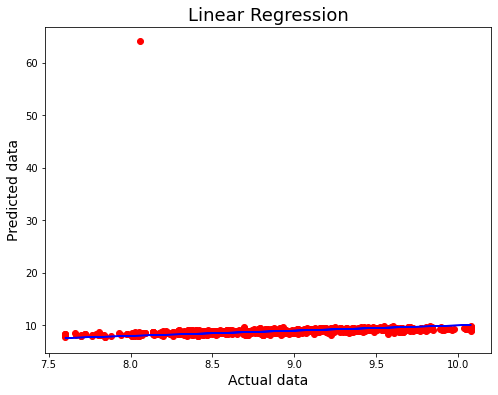

In [636]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=pred_test, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [637]:
# Importing Libraries and Hyper parameter tuning: 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [638]:
#using ridge 

from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1,10],'random_state':list(range(0,10))}
ls = Ridge()
clf = GridSearchCV(ls,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [639]:
ls = Ridge(alpha=10,random_state=0)
ls.fit(train_x,train_y)
ls.score(train_x,train_y)
print('ls score',ls.score(train_x,train_y))
pred_ls = ls.predict(test_x)

r2s = r2_score(test_y,pred_ls)
print('r2 score',r2s*100)

ls score 0.5516110209659202
r2 score 50.18705095216382


In [640]:
cv_score=cross_val_score(ls,x,y,cv=7)
cv_mean=cv_score.mean()
cv_mean

-0.11734359784194527

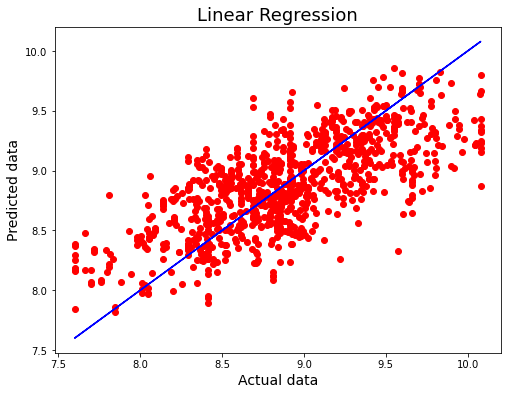

In [641]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=pred_ls, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

## 1. Decision Tree:

In [642]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'mae'],
              'max_features':["auto","sqrt", "log2"],
              'max_depth':[2,4,8,10,None],
            'min_samples_split':[0.25,0.5,1.0]}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'mae', 'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 0.25}


In [710]:
dt =DecisionTreeRegressor(criterion="mae",max_features="auto",max_depth=8,min_samples_split=0.25)
dt.fit(train_x,train_y)
dt.score(train_x,train_y)
predt = dt.predict(test_x)
print('dt score',dt.score(train_x,train_y))
dts = r2_score(test_y,predt)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=9)
dtc = dtscore.mean()
print('Cross Val Score:',dtc*100)
print("Mean squared error:",mean_squared_error(test_y,predt))
print("Mean absolute error:",mean_absolute_error(test_y,predt))
print('RMSE:', np.sqrt(mean_squared_error(test_y, predt)))

dt score 0.478803495265008
R2 Score: 45.65735916342003
Cross Val Score: 10.764320783574728
Mean squared error: 0.1435260462853402
Mean absolute error: 0.2932615890628662
RMSE: 0.3788483156691345


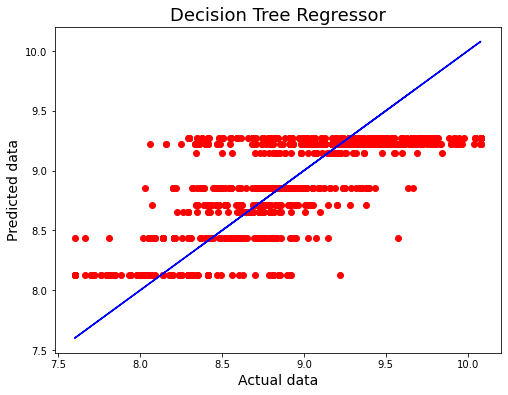

In [644]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predt, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

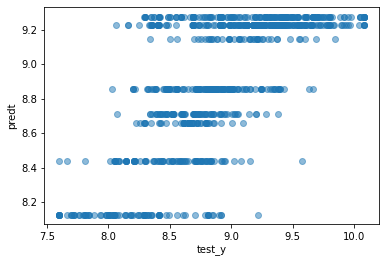

In [645]:
plt.scatter(test_y,predt,alpha=0.5)
plt.xlabel("test_y")
plt.ylabel("predt")
plt.show()

2. k-neighbors Regressor

In [646]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error

parameters = {'n_neighbors':list(range(0,10)),
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
              }
kn =KNeighborsRegressor()
clf = GridSearchCV(kn,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'distance'}


In [774]:
kn =KNeighborsRegressor(n_neighbors=5,algorithm='ball_tree',weights='distance')
kn.fit(train_x,train_y)
kn.score(train_x,train_y)
predkn = kn.predict(test_x)
print('kn score',kn.score(train_x,train_y))
kns = r2_score(test_y,predkn)
print('R2 Score:',kns*100)

knscore = cross_val_score(kn,x,y,cv=6)
knc = knscore.mean()
print('Cross Val Score:',knc*100)
print("Mean squared error:",mean_squared_error(test_y,predkn))
print("Mean absolute error:",mean_absolute_error(test_y,predkn))
print('RMSE:', np.sqrt(mean_squared_error(test_y, predkn)))

kn score 0.9997041598083453
R2 Score: 71.56571846719264
Cross Val Score: -23.428213134783817
Mean squared error: 0.07509866919498315
Mean absolute error: 0.18648717606099352
RMSE: 0.2740413640218993


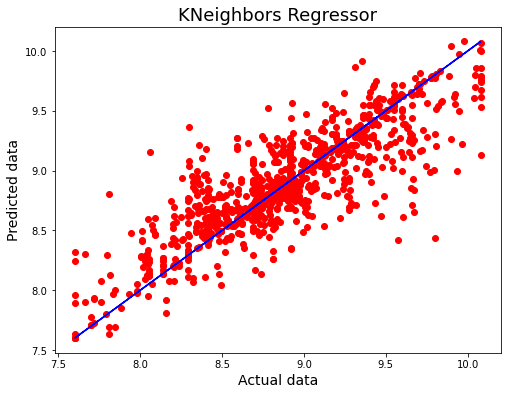

In [648]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predkn, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('KNeighbors Regressor',fontsize=18)
plt.show()

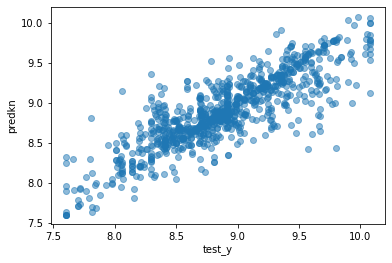

In [649]:
plt.scatter(test_y,predkn, alpha = 0.5)
plt.xlabel("test_y")
plt.ylabel("predkn")
plt.show()

## 3. Random forest regressor

In [711]:
# Importing Libraries and Hyper parameter tuning:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'bootstrap': [True, False], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters,cv =6, n_jobs = -1, verbose = 2,refit = False)
clf.fit(train_x,train_y)

print(clf.best_params_)

Fitting 6 folds for each of 240 candidates, totalling 1440 fits
{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}


In [712]:
rf= RandomForestRegressor(criterion="mse",max_features="auto",max_depth=None,bootstrap=True,n_estimators=15)
rf.fit(train_x,train_y)
rf.score(train_x,train_y)
predrf = rf.predict(test_x)
print('rf score',rf.score(train_x,train_y))
rfs = r2_score(test_y,predrf)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,x,y,cv=6)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)
print("Mean squared error:",mean_squared_error(test_y,predrf))
print("Mean absolute error:",mean_absolute_error(test_y,predrf))
print('RMSE:', np.sqrt(mean_squared_error(test_y, predrf)))

rf score 0.9719211732040074
R2 Score: 81.9609580888492
Cross Val Score: 30.15636213785588
Mean squared error: 0.04764347710058702
Mean absolute error: 0.14673604760568396
RMSE: 0.21827385803294683


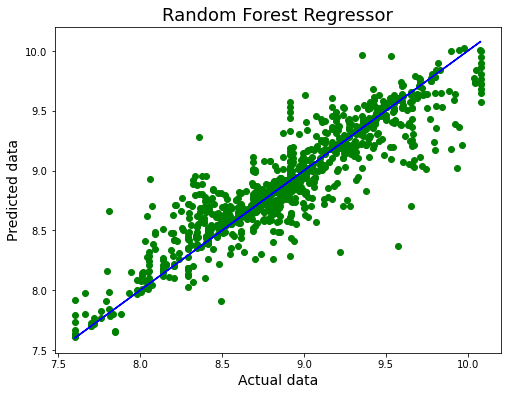

In [713]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predrf, color='g')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('Random Forest Regressor',fontsize=18)
plt.show()


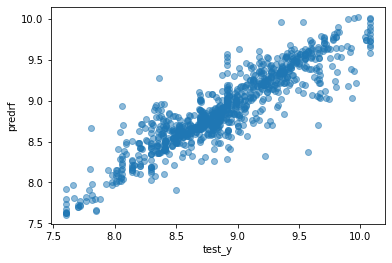

In [714]:
plt.scatter(test_y,predrf, alpha = 0.5)
plt.xlabel("test_y")
plt.ylabel("predrf")
plt.show()

## 4. XGBOOST

In [675]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [682]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xg.fit(train_x,train_y)
y_predict_speed = xg.predict(test_x)

from sklearn.metrics import r2_score
print("R2 score:", r2_score(test_y,y_predict_speed, multioutput='variance_weighted'))

R2 score: 0.8228302524945366


In [683]:
# evaluate xgboost ensemble for regression
from numpy import mean
from numpy import std

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

xgb = XGBRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(xgb, x, y, scoring='neg_mean_absolute_error', cv=6, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.275 (0.057)


In [684]:
xgb = XGBRegressor()
xgb.fit(train_x, train_y)
print(); print(xgb)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [680]:
expected_y  = test_y
predicted_y = xgb.predict(test_x)

In [688]:
xgscore = cross_val_score(xgb,x,y,cv=6)
xgc = xgscore.mean()
print('Cross Val Score:',xgc*100)

Cross Val Score: 41.717000268272805


0.8228302524945366
0.0004794620940568078


<AxesSubplot:xlabel='Price'>

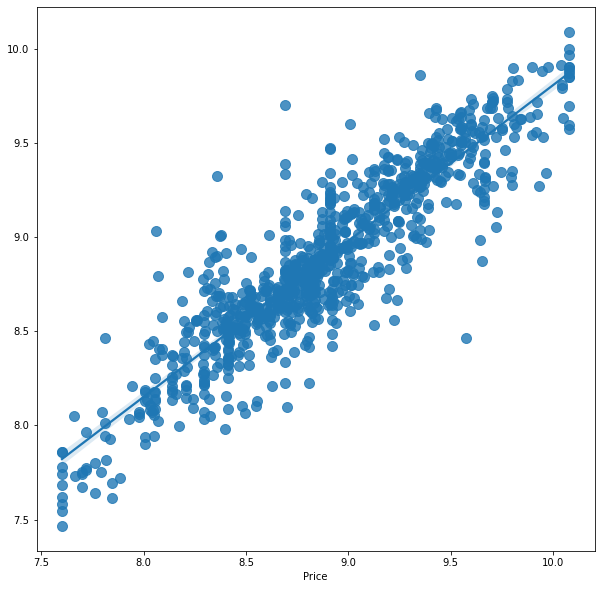

In [689]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

## 5. SVR

In [692]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr =SVR()
clf = GridSearchCV(estimator = svr, param_grid = parameters, 
                      cv =6, n_jobs = -1, verbose = 2)
clf.fit(train_x,train_y)
clf.best_params_

Fitting 6 folds for each of 48 candidates, totalling 288 fits


{'C': 10, 'epsilon': 0.2, 'gamma': 1e-07, 'kernel': 'linear'}

In [693]:
svr =SVR(C=10,gamma=1e-07,kernel='linear',epsilon=0.2)
svr.fit(train_x,train_y)
svr.score(train_x,train_y)
predsvr = svr.predict(test_x)
print('svr score',svr.score(train_x,train_y))
svrs = r2_score(test_y,predsvr)
print('R2 Score:',svrs*100)

svrscore = cross_val_score(svr,x,y,cv=7)
svrc = svrscore.mean()
print('Cross Val Score:',svrc*100)
print("Mean squared error:",mean_squared_error(test_y,predsvr))
print("Mean absolute error:",mean_absolute_error(test_y,predsvr))

svr score 0.5483217192188305
R2 Score: 49.440710942774466
Cross Val Score: -4.2536534364401435
Mean squared error: 0.1335337177154001
Mean absolute error: 0.28666600544676685


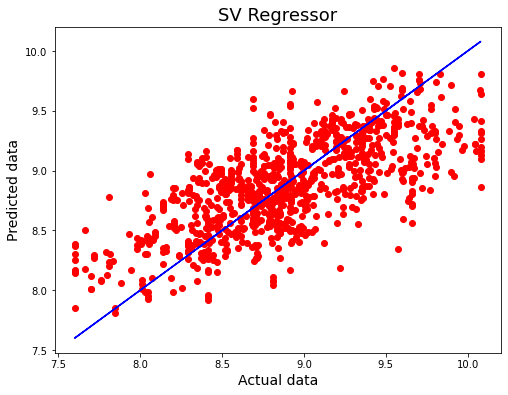

In [695]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_y, y=predsvr, color='r')
plt.plot(test_y,test_y, color='b')
plt.xlabel('Actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('SV Regressor',fontsize=18)
plt.show()

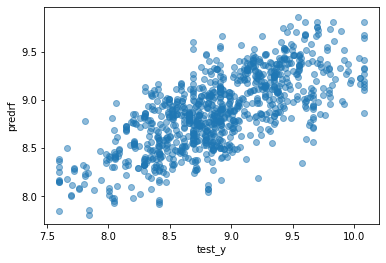

In [696]:
plt.scatter(test_y,predsvr, alpha = 0.5)
plt.xlabel("test_y")
plt.ylabel("predrf")
plt.show()

Random Forest Regressor is the best model as the accuracy of the model is 81.9% while dumping and the predicted values are also nearly equal to actual values.

In [775]:
# Model Dumping

import pickle
filename = 'flight_price.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [776]:
loaded_model = pickle.load(open('flight_price.pkl','rb'))
result = loaded_model.score(test_x, test_y)
print(result)

0.8228302524945366


In [726]:
import numpy as np
a=np.array(test_y)
predict_y =np.array(xgb.predict(test_x))
df_com=pd.DataFrame({"original":a, "predicted": predict_y},index=range(len(a)))
df_com


,original,predicted
0,9.676022,9.792955
1,8.928905,8.739372
2,9.048880,8.995663
3,8.610501,8.561125
4,8.919854,8.642220
...,...,...
945,9.173676,9.531391
946,9.933338,9.025943
947,8.699681,8.798824
948,8.690138,8.523773


Predicted values are approximately equal to actual values